<a href="https://colab.research.google.com/github/varunpav/DataProject2/blob/main/DP2_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part 1: Data Ingestion and Analysis
- Idea behind this part of the project is to define a method to make an API call and a seperate method to activate that call over the hour

In [ ]:
# Install necessary packages before proceeding
!pip install requests pandas sqlalchemy

In [ ]:
# Import statements as well as creating the db
import requests
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy.sql import text
import time
from datetime import datetime

engine = create_engine('sqlite:///api_data.db')

In [ ]:
# Defining the API call method

def api_call():
  # Recieve the data from the endpoint
  response = requests.get("https://4feaquhyai.execute-api.us-east-1.amazonaws.com/api/pi")
  data = response.json()
  # Transfer the data into a dataframe
  df = pd.DataFrame([data])
  # Add a column named "timestamp" to capture exactly when that data was added
  df['timestamp'] = datetime.now()
  # Add the data to the db we created
  df.to_sql('api_data', con=engine, if_exists='append', index=False)
  # Quick print statement to verify timing calls
  print(f"Data stored at {datetime.now()}")

# Clear the existing db before we make our 60 calls
def clear_table():
  with engine.connect() as connection:
    connection.execute(text("DROP TABLE IF EXISTS api_data"))

In [ ]:
# Timing logic

# Clear anything from the existing db if it exists
clear_table()

# Set the start time and counter for runtime
start = time.time()
minutes = 0

# While under 60 mins, make API call, sleep for 1 min, then inc counter
while minutes < 60:
  api_call()
  time.sleep(60 - ((time.time() - start) % 60))
  minutes += 1

Data stored at 2024-05-08 00:41:28.784126
Data stored at 2024-05-08 00:42:28.812069
Data stored at 2024-05-08 00:43:28.876431
Data stored at 2024-05-08 00:44:28.890005
Data stored at 2024-05-08 00:45:28.852759
Data stored at 2024-05-08 00:46:28.892001
Data stored at 2024-05-08 00:47:28.933339
Data stored at 2024-05-08 00:48:28.952125
Data stored at 2024-05-08 00:49:28.831047
Data stored at 2024-05-08 00:50:29.056301
Data stored at 2024-05-08 00:51:28.956428
Data stored at 2024-05-08 00:52:28.956974
Data stored at 2024-05-08 00:53:28.955528
Data stored at 2024-05-08 00:54:29.015473
Data stored at 2024-05-08 00:55:29.057490
Data stored at 2024-05-08 00:56:29.095847
Data stored at 2024-05-08 00:57:29.155606
Data stored at 2024-05-08 00:58:29.062484
Data stored at 2024-05-08 00:59:29.156301
Data stored at 2024-05-08 01:00:28.695774
Data stored at 2024-05-08 01:01:28.696775
Data stored at 2024-05-08 01:02:28.644530
Data stored at 2024-05-08 01:03:28.668971
Data stored at 2024-05-08 01:04:28

Analysis for Part 1:

              factor         pi                      timestamp
count      60.000000  60.000000                             60
mean    52215.016667   3.168573  2024-05-08 01:10:58.772127488
min         1.000000   3.017072     2024-05-08 00:41:28.754646
25%      3217.250000   3.141561  2024-05-08 00:56:14.070393856
50%     25694.500000   3.141598  2024-05-08 01:10:58.651776512
75%     86669.250000   3.141636  2024-05-08 01:25:43.646733312
max    205379.000000   4.000000     2024-05-08 01:40:28.823347
std     60138.943290   0.156621                            NaN


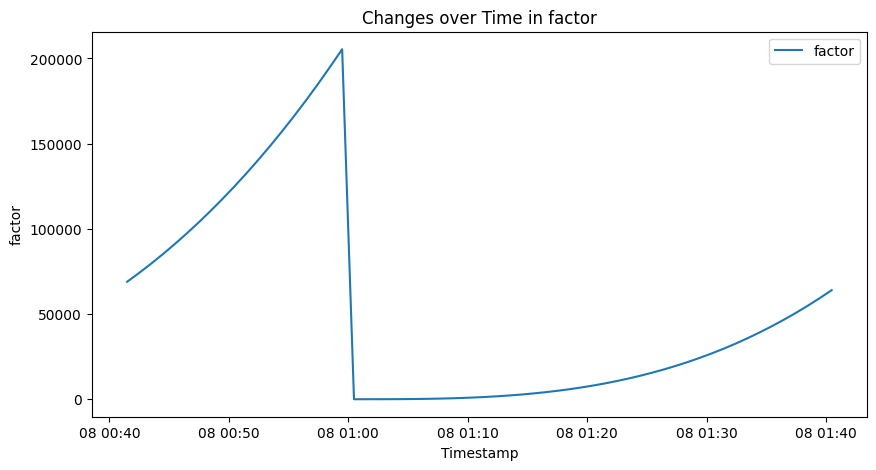

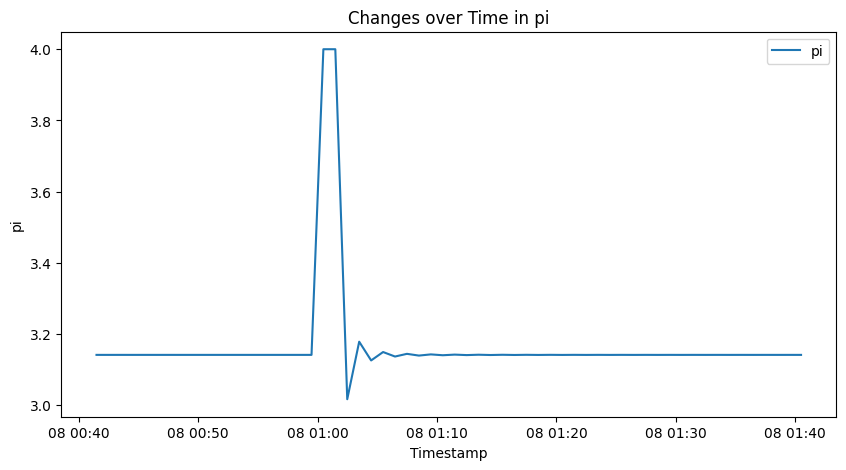

In [ ]:
# Describe the df
df = pd.read_sql('api_data', con=engine)
print(df.describe())

# Plotting trends over time
import matplotlib.pyplot as plt

# every column other than timestamp
for column in df.columns:
    if column != 'timestamp' and column != 'time':
        plt.figure(figsize=(10, 5))
        plt.plot(df['timestamp'], df[column], label=column)
        plt.xlabel('Timestamp')
        plt.ylabel(column)
        plt.title(f'Changes over Time in {column}')
        plt.legend()
        plt.show()

Analysis for this part of the project and the proof of consistent application will be included in a seperate document that will be in the github repository.